# Model the Total Cost of Ownership for electric transport vehicles

### Defining our data set

Import libraries:

In [1]:
import os
import numpy as np
import pandas as pd
import openpyxl
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import datetime
import random
%matplotlib inline

### Run Excell spreadsheet Topsector Logistiek

To be able to calculate the TCO value for several input values, we rewrite values in the excel sheet and then import the results in this notebook.

In [2]:
from openpyxl import Workbook,load_workbook

# specify location Excel workbook
dest_filename = r'C:\Users\meer0084\Documents\test.xlsx'

# open workbook with formulas
if os.path.isfile(dest_filename):
    wb = load_workbook(filename = dest_filename) # In case of xslm file add following options: read_only=False, keep_vba=True
else:
    wb = Workbook()

ws = wb['TCO module ondernemers']

# ask for input values
vtype = str(input('Voertuigtype: ')) # {Kleine bakwagen (12t), Grote bakwagen (18t), Trekker-oplegger}
koeling = str(input('Koelmachine (J/N): ')) # {gekoeld, niet gekoeld}
km = input('Verwacht jaarkilometrage: ') # > 0
el = str(input('Grijze/groene elektriciteit: ')) # {grijs, groen}
cap = input('Capaciteit vrachtwagenbatterij: ') # {160,200,240}, default value = 160
kwh = input('Vermogen eigen oplaadsysteem: ') # {3,7 , 20, 50, 150, 350} kWh, default value = 20

# insert input values in sheet, if empty insert default values
ws.cell(12, 2).value = vtype #'Grote bakwagen (18t)' if len(vtype)==0 else 
ws.cell(13, 2).value = koeling #
ws.cell(14, 2).value = km #
ws.cell(15, 2).value = el #'grijs' if len(koeling)==0 else el
ws.cell(13, 5).value = cap
ws.cell(15, 5).value = kwh

# save and close file
wb.save(filename = dest_filename)
wb.close()

C:\Users\meer0084\Anaconda3\envs\ZET\lib\site-packages\openpyxl\reader\drawings.py:59: UserWarning: wmf image format is not supported so the image is being dropped
  warn(msg)
C:\Users\meer0084\Anaconda3\envs\ZET\lib\site-packages\openpyxl\worksheet\_reader.py:300: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


Voertuigtype: Kleine bakwagen (12t)
Koelmachine (J/N): gekoeld
Verwacht jaarkilometrage: 20000
Grijze/groene elektriciteit: groen
Capaciteit vrachtwagenbatterij: 
Vermogen eigen oplaadsysteem: 


Read results from workbook and put in a list, then select the important variables.

In [3]:
# Open workbook with data_only flag

if os.path.isfile(dest_filename):
    wb_ro = load_workbook(filename = dest_filename , data_only=True)
else:
    wb_ro = Workbook()

ws_ro = wb_ro['TCO module ondernemers']

In [4]:
# make list
data_rows = []
for row in ws_ro.iter_rows(min_col=1, min_row=33, max_col=6, max_row=105):
    if row[0].value is not None:
        data_rows.append([cell.value for cell in row])
    else: continue
        
# check if data value        
print(ws_ro['C44'].value) # if None, recalculate excel sheet to fill cache

None


In [5]:
# define columns
def column(matrix, i):
    return [row[i] for row in matrix]

kosten_post=column(data_rows,0)
thuis_opladen=column(data_rows,2)
optimale_mix=column(data_rows,3)
diesel=column(data_rows,4)

In [6]:
# select indexes
l1 = kosten_post
matched_indexes = []
i = 0
length = len(l1)

while i < length:
    if ':' in l1[i] and 'km' not in l1[i]:
        matched_indexes.append(i)
    i += 1

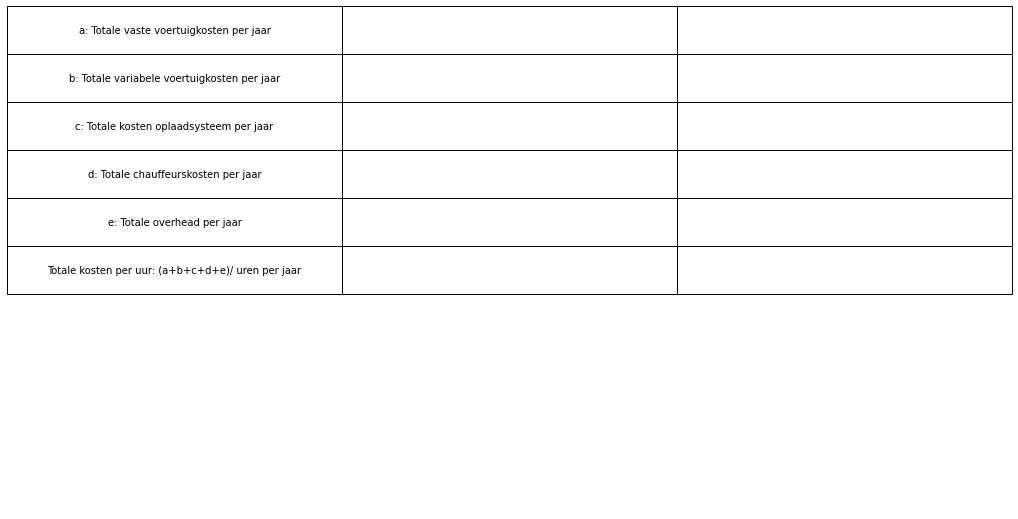

In [7]:
# show table with results

kosten_post_kosten = [kosten_post[i] for i in matched_indexes]
thuis_opladen_kosten = [thuis_opladen[i] for i in matched_indexes]
diesel_kosten = [diesel[i] for i in matched_indexes]

l = [kosten_post_kosten, thuis_opladen_kosten, diesel_kosten]
l = list(map(list, zip(*l)))
kosten_tabel=plt.table(cellText=l,loc='top', colLabels = None, cellLoc='center')
plt.axis("off")
kosten_tabel.auto_set_font_size(False)
kosten_tabel.set_fontsize(10)
kosten_tabel.scale(3, 4)
plt.show()

In [8]:
# Make bar plot
index = ['a', 'b', 'c', 'd', 'e', 'tot/uur']
df = pd.DataFrame({'electrisch': thuis_opladen_kosten,
                   'diesel': diesel_kosten}, index=index)
ax = df.plot.bar(rot=0)
ax.set_yscale('log')
ax.set_title('TCO costs 2020');

TypeError: no numeric data to plot

### Include a time axis to the model

To come up with a smart TCO model that includes the evaluation of the cost components in time, we need to define a time scale first.

In [ ]:
i = 0
year = []
last_year = 2020
while i < 10: # N.B. make ds.sizes or len(ds)    
    year.append(last_year) 
    last_year += 1
    i += 1
    
print(year)

Now we are able to change the input parameters over the years, and look how the tco values will evolve accordingly.

In [ ]:
# Read type and battery capacity
vehicle_type = ws_ro['B12']
battery_capacity = ws_ro['E13']

# get current vehicle price
mp = wb_ro['Model parameters']
vehicle_price = []
diesel_price = []
last_value = mp['E5'].value # N.B. change this line to select correct box including both strings above
last_value_diesel = mp['E18'].value # N.B. change this line to select correct box including both strings above

# close read-only wb
wb_ro.close()

In [ ]:
# predict purchase price 2020-2030
i = 0
while i < 10: # N.B. make ds.sizes or len(ds)    
    vehicle_price.append(last_value) 
    diesel_price.append(last_value_diesel)
    last_value = last_value*0.9 + random.uniform(-1000,1000)
    last_value_diesel = last_value_diesel*1.01 + random.uniform(-1000,1000)
    i += 1

In [ ]:
# change purchase price in sheet and read result 
i = 0
tco_per_year = []
while i < 1:
    
    # Open workbook to write values
    if os.path.isfile(dest_filename):
        wb = load_workbook(filename = dest_filename) 
    else:
        wb = Workbook()

    ws = wb['TCO module ondernemers']
    
    ws.cell(24,5).value = vehicle_price[i]
    ws.cell(24,5).value = vehicle_price[i]
    #ws.cell(22,5).value = subsidies[i] 
    
    # save and close workbook
    wb.save(filename = dest_filename)
    wb.close()
    
    # Open workbook with data_only and read_only flag
    if os.path.isfile(dest_filename):
        wb_ro = load_workbook(filename = dest_filename, data_only=True, read_only=True) 
    else:
        wb_ro = Workbook()

    ws_ro = wb_ro['TCO module ondernemers']
    
    # read total costs of ownership
    tco_per_year.append(ws_ro['C44'].value)
    
    # close workbook
    wb_ro.close() 


In [ ]:
# plot price evolution in time
plt.plot(year,vehicle_price, c='blue', label = 'electric');
plt.plot(year,diesel_price, c='orange', label ='diesel');
plt.plot(year,tco_per_year, c='red', label ='tco per year');
plt.xlabel('year')
plt.ylabel('TCO per year')
plt.title('TCO per year comparison');
plt.legend(loc='best')
plt.show()

In [ ]:
# show costs components in histogram

bins = 10
data = np.random.randn(1000, 3)

colors = ['blue','green', 'red']
plt.hist(data, bins, histtype='bar', color=colors, stacked=True, fill=True)

plt.show()

### Find best time to replace diesel vehicle by BEV

In [ ]:
# select strategy to be computed
# strategy 1: replace diesel vehicle with similar electric vehicle if old vehicle is written off
# strategy 2: keep diesel vehicle x years longer until diesel tco per year = electric tco per year
# strategy 3: replace old diesel truck with new diesel truck/hybrid truck until year x

# compute strategy

In [ ]:
# select scenario (Elaad) for price evolution

### Calculate the TCO for a fleet of vehicles

In [ ]:
# Select number of vehicles and type in fleet